# Configuring MPL fonts

- Last: 2022/08/08 Jang
- First: 2020/05/23 Jang

## References

MPL docs

* [Configuring the font family](https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/font_family_rc_sgskip.html#sphx-glr-gallery-text-labels-and-annotations-font-family-rc-sgskip-py)
* [Using a ttf font file in Matplotlib](https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/font_file.html#sphx-glr-gallery-text-labels-and-annotations-font-file-py)


Stack Overflow

* [Find out which font matplotlib uses
](https://stackoverflow.com/questions/27817912/find-out-which-font-matplotlib-uses)

## Getting and setting typefaces

Tested platform: MS Windows 10

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
# from IPython.display import set_matplotlib_formats  # Deprecated since IPython 7.23
from matplotlib_inline.backend_inline import set_matplotlib_formats  # Substitute for set_matplotlib_formats

In [2]:
# MPL
set_matplotlib_formats('svg')

# Data path
# print('matplotlibrc: [{}]'.format(mpl.rcParams['datapath']))  # Deprecated
mpl_datapath = mpl.get_data_path()

In [3]:
def plot_sine(ax, xdata,
              **attrs):
    if 'style' in attrs:
        plt.style.use(attrs['style'])
    # Typeface family
    if 'curr_typeface_fam' in attrs:
        curr_typetypeface_fam = re.sub(r'.*\\([\w.]+ttf)$',
                                       r'\1',
                                       fm.findfont(fm.FontProperties(family=attrs['curr_typeface_fam'])))
        ax.text(.25*np.pi, 0,
                'Typeface family: {}'.format(curr_typetypeface_fam),
                fontsize=14)
    # Typeface for math text
    if 'curr_typeface_for_mathtext' in attrs:
        curr_typeface_for_mathtext = re.sub(r'.*\\([\w.]+ttf)$',
                                            r'\1',
                                            attrs['curr_typeface_for_mathtext'])
        ax.text(.25*np.pi, -0.25,
                'Typeface for math text: {}'.format(curr_typeface_for_mathtext),
                fontsize=14)
    ax.tick_params(axis='both', direction='in', length=5, labelsize=14)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y(x)$')
    ax.plot(xdata, np.sin(xdata), 'ro',
            ls='none')

In [4]:
def plot_cosine(ax, xdata, **attrs):
    if 'annot' in attrs:
        plt.text(0.75*np.pi, np.cos(np.pi/2), attrs['annot'], fontsize=18)
    ax.tick_params(axis='both', direction='in', length=5, labelsize=14)
    ax.set_xlabel('$x$')
    ax.set_ylabel(r'$y(x)$')
    ax.plot(xdata, np.cos(xdata), 'ms')

In [5]:
def show_typeface_fam(typeface):
    header = "mpl.rcParams['{}']".format(typeface)
    print('-' * len(header))
    print(header)
    print('-' * len(header))
    for tf in mpl.rcParams[typeface]:
        print(tf)

In [6]:
def show_curr_typeface_files(family):
    for s in ['normal', 'italic', 'oblique']:
        print('{}, {}: {}'.format(family, s, fm.findfont(fm.FontProperties(family=family, style=s))))

### Font-related paths

In [7]:
print('matplotlibrc: [{}]'.format(mpl_datapath))
print('.ttf:         [{}\\fonts\\ttf]'.format(mpl_datapath))
print('Font cache:   [{}]'.format(mpl.get_cachedir()))

matplotlibrc: [C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data]
.ttf:         [C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf]
Font cache:   [C:\Users\jang\.matplotlib]


### MSWin default

In [8]:
curr_typeface_sty = mpl.rcParams['font.family']
print('Current typeface style: {}'.format(curr_typeface_sty))
print('')
print('List of designated typefaces in the order of preferance (not necessarily reflect the availability):')
show_typeface_fam('font.{}'.format(curr_typeface_sty[0]))

Current typeface style: ['sans-serif']

List of designated typefaces in the order of preferance (not necessarily reflect the availability):
-------------------------------
mpl.rcParams['font.sans-serif']
-------------------------------
DejaVu Sans
Bitstream Vera Sans
Computer Modern Sans Serif
Lucida Grande
Verdana
Geneva
Lucid
Arial
Helvetica
Avant Garde
sans-serif


In [9]:
show_curr_typeface_files(curr_typeface_sty)

['sans-serif'], normal: C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf
['sans-serif'], italic: C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans-Oblique.ttf
['sans-serif'], oblique: C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans-Oblique.ttf


In [10]:
curr_typeface_for_mathtext = mpl.rcParams['mathtext.fontset']
print("Current typeface for math text: '{}'".format(curr_typeface_for_mathtext))

Current typeface for math text: 'dejavusans'


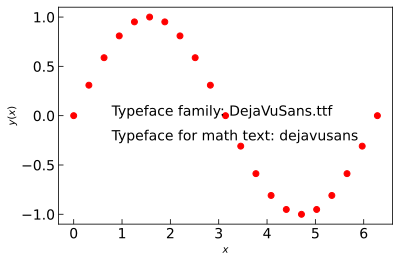

In [11]:
ax1 = plt.subplot()
plot_sine(ax1, np.linspace(0, 2*np.pi, 21),
          curr_typeface_fam=curr_typeface_sty,
          curr_typeface_for_mathtext=curr_typeface_for_mathtext)

### Math text: Computer Modern

In [12]:
mpl.rcParams['mathtext.fontset'] = 'cm'

In [13]:
curr_typeface_for_mathtext = mpl.rcParams['mathtext.fontset']
print('Current typeset for math text: {}'.format(curr_typeface_for_mathtext))

Current typeset for math text: cm


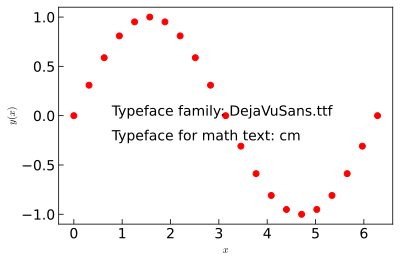

In [14]:
ax1 = plt.subplot()
plot_sine(ax1, np.linspace(0, 2*np.pi, 21),
          curr_typeface_fam=curr_typeface_sty,
          curr_typeface_for_mathtext=curr_typeface_for_mathtext)

### Typeset: Tahoma

In [15]:
mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                                   'Lucida Grande', 'Verdana']

In [16]:
show_typeface_fam('font.sans-serif')

-------------------------------
mpl.rcParams['font.sans-serif']
-------------------------------
Tahoma
DejaVu Sans
Lucida Grande
Verdana


In [17]:
show_curr_typeface_files(curr_typeface_sty)

['sans-serif'], normal: C:\Windows\Fonts\tahoma.ttf
['sans-serif'], italic: C:\Windows\Fonts\tahoma.ttf
['sans-serif'], oblique: C:\Windows\Fonts\tahoma.ttf


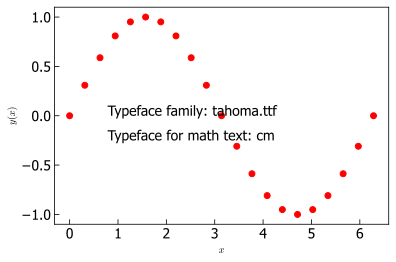

In [18]:
ax2 = plt.subplot()
plot_sine(ax2, np.linspace(0, 2*np.pi, 21),
          curr_typeface_fam=curr_typeface_sty,
          curr_typeface_for_mathtext=curr_typeface_for_mathtext)

Tahoma worked!

### Helvetica

In [19]:
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Verdana',
                                   'Tahoma', 'DejaVu Sans']

In [20]:
show_typeface_fam('font.sans-serif')

-------------------------------
mpl.rcParams['font.sans-serif']
-------------------------------
Helvetica
Verdana
Tahoma
DejaVu Sans


In [21]:
show_curr_typeface_files(curr_typeface_sty)

['sans-serif'], normal: C:\Windows\Fonts\verdana.ttf
['sans-serif'], italic: C:\Windows\Fonts\verdanai.ttf
['sans-serif'], oblique: C:\Windows\Fonts\verdanai.ttf


Helvetica NOT worked as MS Win does not have helvetica.ttf by default.

#### Workaround

1. Purchase Helvetica TTF files from [Monotype](https://catalog.monotype.com/family/linotype/helvetica).
1. Save the Helvetica TTF files to [.ttf dir](#Font-related-paths).
1. Go to the [font cache dir](#Font-related-paths) and remove 'fontlist-v*.json'.
1. Restart this notebook (or rerun a Python script containing MPL plotting commands) and plot something.
   This will generate a new 'fontlist-v*.json' file.
1. If you want to change the default ordered list of typefaces, do the following:
   1. Open [matplotlibrc](#Font-related-paths).
   1. Look up "#font.sans-serif", modify that row as you want, and save the matplotlibrc file.
   1. Go to the [font cache dir](#Font-related-paths) and remove 'fontlist-v*.json'.
   1. Restart this notebook or rerun a Python script, and plot something.

### Type 3 to TrueType, providing font embedment

References

* [Avoiding Type 3 fonts in matplotlib plots](http://phyletica.org/matplotlib-fonts/)

Arial

In [22]:
mpl.rcParams['font.sans-serif'] = ['Arial']

In [23]:
show_typeface_fam('font.sans-serif')

-------------------------------
mpl.rcParams['font.sans-serif']
-------------------------------
Arial


In [24]:
show_curr_typeface_files(curr_typeface_sty)

['sans-serif'], normal: C:\Windows\Fonts\arial.ttf
['sans-serif'], italic: C:\Windows\Fonts\ariali.ttf
['sans-serif'], oblique: C:\Windows\Fonts\ariali.ttf


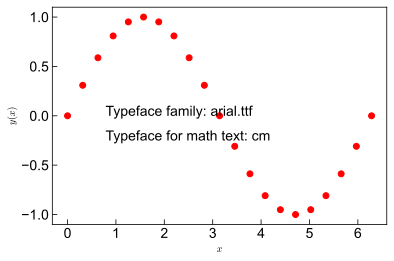

In [25]:
# Type 3 (Postscript)
ax3 = plt.subplot()
ft = 3
mpl.rcParams.update({'pdf.fonttype': ft})
plot_sine(ax3, np.linspace(0, 2*np.pi, 21),
          curr_typeface_fam=curr_typeface_sty,
          curr_typeface_for_mathtext=curr_typeface_for_mathtext)
plt.savefig('arial_type{}.pdf'.format(ft))

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
meta NOT subset; don't know how to subset; dropped


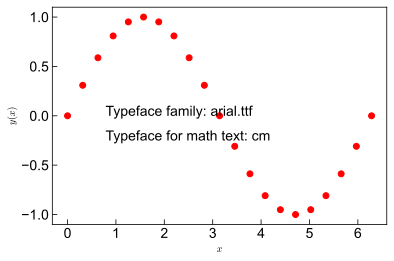

In [26]:
# TrueType (Type 42: PostScript's TrueType wrapper)
ax4 = plt.subplot()
ft = 42
mpl.rcParams.update({'pdf.fonttype': ft})
plot_sine(ax4, np.linspace(0, 2*np.pi, 21),
          curr_typeface_fam=curr_typeface_sty,
          curr_typeface_for_mathtext=curr_typeface_for_mathtext)
plt.savefig('arial_type{}.pdf'.format(ft))